<a href="https://colab.research.google.com/github/allegheny-college-cmpsc-101-fall-2023/course-materials/blob/main/Notes/Templates/CMPSC101_F2023_complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 11 - Algorithmic Complexity
https://ocw.mit.edu/courses/6-0001-introduction-to-computer-science-and-programming-in-python-fall-2016/resources/lecture-10-understanding-program-efficiency-part-1/

## Reliablity vs Performance

- what is reliable?
- What else could make code performant?
  - efficiency in space (memory)
    - not current focus
  - efficiency in time (speed)
    - the book gives the example that the speed and accuarcy of code is extremely important in real-time contexts such as for flight control systems

## Writing efficient programs can be difficult

- there is a usually a tradeoff between efficiency and complexity
  - i.e. more efficient algorithms are usually more complex
  - can you think of an example of this???
    - binary search vs linear search
      - binary search is faster and complicated (but time complexity is lower!)
      - linear search is slower and less complicated (time complexity if higher!)

## Consider these simple problems

1. I have a list, and I read the last element
1. I have a list, and I read the first element
1. I am moving apples from one room to another room. I can only move one apple at a time. How many steps does it take to move n apples?
```python
step = 0
for apple in range(100):
    step +=1
print(step)
```
2. There are two rooms, one with n apples, the other with n pears. I am moving n apples from one room to another, one at a time, but every time I move one apple, I have to move all the pears to the other room, one at a time. How many steps is that?
```python
step = 0
for apple in range(100):
    for pear in range(100):
        step +=1
print(step)
```

In [2]:
n = 5
steps = 0
for apple in range(n):
  for pear in range(n):
    steps +=1
print("steps:", steps)

25


## Worst-case time complexity analysis

- We compute the worst-case scenario because sometimes the number of steps could be really short due to the particular data! But knowing the upper-bound prepares us.

- Would you take this gamble: you can win \$10 or loose anywhere between \$1 to \$1000
The upper bound on the loss is 1000 and it impacts decision-making.

- Algorithms can be evaluated in the same way.

In [ ]:
def linear_search(L, x):
  for e in L:
    if e == x:
      return True
  return False

linear_search([i for i in range(10e10)], 1)
linear_search([i for i in range(10e10)], 10e10 - 1)

## Orders of Magnitude vs Step count

In [ ]:
# factorial algorithm
def f(i):
  """Assumes i is an int and i >= 0"""
  answer = 1
  while i >= 1:
    answer *= i
    i -= 1
  return answer

How could the code above be characterized?
- time it - timing depends on input and the machine used
- count how many steps are required  - also depends on input, but not on machine
- count steps as a function of input
- in other words, summarize how the number of steps SCALES with the input


Random Access Machine executes simple steps, one at a time
- binding variable name to an object
- making a comparison
- executing an arithmetic operation
- accessing an object in memory
- ... But counting steps is not that useful
  - consider an airplane ticket for \$60 vs \$560

Only the order of magnitude matters - not any constants or multipliers

> "rules of thumb in describing the asymptotic complexity of an algorithm:
- If the running time is the sum of multiple terms, keep the one with the largest growth rate, and drop the others.
- If the remaining term is a product, drop any constants."

- asymtotic analysis is useful to describe the behaviors at very large numbers approaching infinity
- developed by Donald Knuth (fun facts: https://www-cs-faculty.stanford.edu/~knuth/fant.html)



## Order types and Big O

$f(x) ∈ O(x^2)$

This means, the function f(x) is drawn from the family of algorithms that are quadratic.

- the algorithms could be $1*n^2$ up to $9*n^2$, all would be Order $n^2$

- $O(1)$ denotes constant running time.
- $O(\log(n))$ denotes logarithmic running time.
- $O(n)$ denotes linear running time.
- $O(n \log(n))$ denotes log-linear running time.
- $O(n^k)$ denotes polynomial running time. Notice that k is a constant.
- $O(c^n)$ denotes exponential running time. Here a constant is being raised to a power based on the size of the input.

## Visualizations

Text(0.5, 1.0, 'Linear')

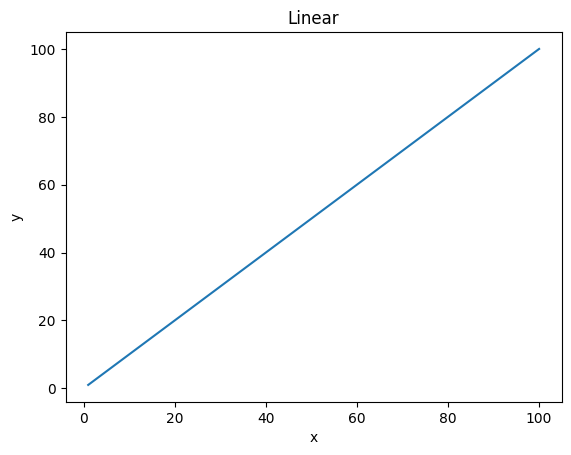

In [2]:
import matplotlib.pyplot as plt
x = [i+1 for i in range(100)]
y = x
plt.plot(x,y);
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear")

Text(0.5, 1.0, 'y = log(x)')

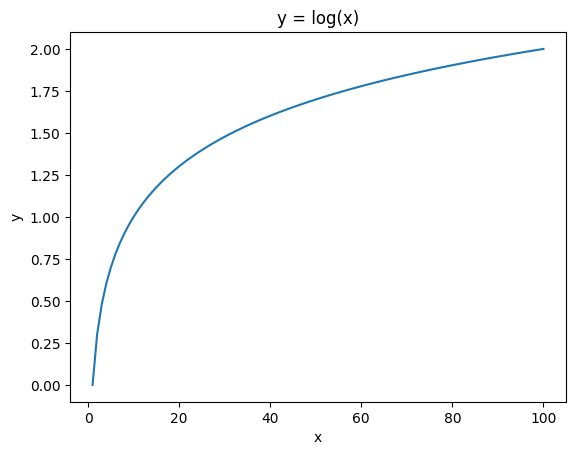

In [3]:
import math

plt.plot(x,[math.log10(i) for i in x]);
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = log(x)")

In [4]:
epsilon = 0.00001
print('math.log(1) == 0', math.log(1) == 0)
print('math.log(10) == 1', math.log(1) - 1 < epsilon)
print('math.log(100) == 2', math.log(1) - 2 < epsilon)
print('math.log(1000) == 3', math.log(1) - 3 < epsilon)
print('math.log(10000) == 4', math.log(1) - 4 < epsilon)




math.log(1) == 0 True
math.log(10) == 1 True
math.log(100) == 2 True
math.log(1000) == 3 True
math.log(10000) == 4 True


Text(0.5, 1.0, 'y = log(x)')

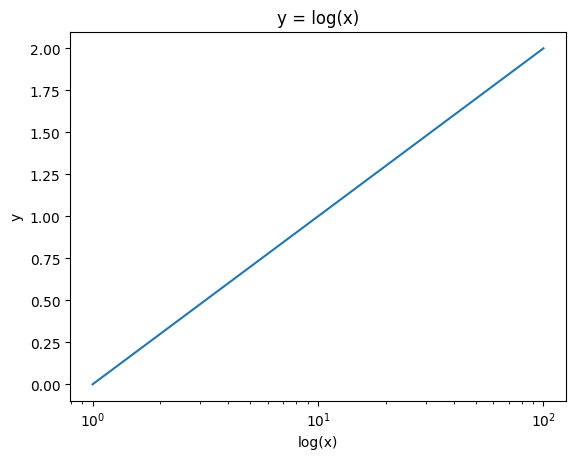

In [5]:
plt.semilogx(x,[math.log10(i) for i in x]);
plt.xlabel("log(x)")
plt.ylabel("y")
plt.title("y = log(x)")


Text(0.5, 1.0, 'Growth Rate Comparisons')

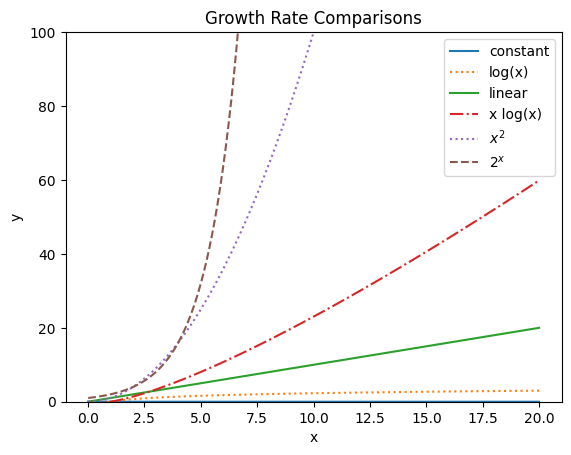

In [10]:
fs = 100
dur = 20
x = [i/fs for i in range(1,dur*fs)]
plt.plot(x,[0 for i in x], label = "constant")
plt.plot(x,[math.log(i) for i in x], ':', label = "log(x)");
plt.plot(x,x, label = "linear");
plt.plot(x,[i*math.log(i) for i in x], '-.',  label = "x log(x)")
plt.plot(x,[i**2 for i in x], ':', label = "$x^2$");
plt.plot(x,[2**i for i in x], '--', label = "$2^x$");
plt.ylim(0,100)

plt.legend();

plt.xlabel("x")
plt.ylabel("y")
plt.title("Growth Rate Comparisons")
